In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [2]:
df_month10 = pd.read_csv('/home/is/shuntaro-o/dev/persons_move_analysis/data/202210Tokyostation.csv',engine='python')
df_month7 = pd.read_csv('/home/is/shuntaro-o/dev/persons_move_analysis/data/202271month_per_hour_in_disaster.csv',engine='python')

In [4]:
df_month10["created_at"]=df_month10["created_at"].astype(str)
created_time=df_month10.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_month10=pd.concat([df_month10,creatid_at_day_list],axis=1)
df_month10=df_month10.rename(columns={0: 'creatid_at_day'})
df_month10=pd.concat([df_month10,creatid_at_hour_list],axis=1)
df_month10=df_month10.rename(columns={0: 'creatid_at_hour'})

In [5]:
df_month7["created_at"]=df_month7["created_at"].astype(str)
created_time=df_month7.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_month7=pd.concat([df_month7,creatid_at_day_list],axis=1)
df_month7=df_month7.rename(columns={0: 'creatid_at_day'})
df_month7=pd.concat([df_month7,creatid_at_hour_list],axis=1)
df_month7=df_month7.rename(columns={0: 'creatid_at_hour'})

In [6]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [7]:
df_month10 = df_month10[df_month10['creatid_at_day'].isin(day_list)]
df_month10 = df_month10[df_month10['creatid_at_hour'].isin(hour_list)]

In [8]:
df_month7 = df_month7[df_month7['creatid_at_day'].isin(day_list)]
df_month7 = df_month7[df_month7['creatid_at_hour'].isin(hour_list)]

In [9]:
df_month10['created_at'] = pd.to_datetime(df_month10['created_at'],format="%Y-%m-%d_%H:%M:%S")
df_month7['created_at'] = pd.to_datetime(df_month7['created_at'],format="%Y-%m-%d_%H:%M:%S")

In [10]:
df_month10 = df_month10.dropna(subset=['created_at'])
df_month7 = df_month7.dropna(subset=['created_at'])

In [11]:
list_tweet_range_month10 = []
for day in day_list:
    day = int(day)
    df_perday = df_month10[(df_month10['created_at'].dt.day==day)]
    list_tweet_range_month10_per_day = []
    for hour in hour_list:
        hour = int(hour)
        df_perhour = df_perday[(df_perday['created_at'].dt.hour==hour)]
        end_time = df_perhour .head(1)['created_at'].values
        start_time = df_perhour .tail(1)['created_at'].values
        if (len(df_perhour)==0 or len(df_perhour)==1):
            delta = 999
        elif (start_time==end_time):
            delta = 2
        else:
            delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_month10_per_day.append(delta)
    list_tweet_range_month10.append(list_tweet_range_month10_per_day)
list_tweets_count_month10 = []
for day in day_list:
    day = int(day)
    df_perday = df_month10[(df_month10['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_month10_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_month10_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_month10_per_hour.append(0)
    list_tweets_count_month10.append(list_tweets_count_month10_per_hour)
list_tweet_range_month10 = np.array(list_tweet_range_month10)
list_tweets_count_month10 = np.array(list_tweets_count_month10)
estimate_month10 = list_tweets_count_month10*(3600/list_tweet_range_month10)

In [12]:
list_tweet_range_month7 = []
for day in day_list:
    day = int(day)
    df_perday = df_month7[(df_month7['created_at'].dt.day==day)]
    list_tweet_range_month7_per_day = []
    for hour in hour_list:
        hour = int(hour)
        df_perhour = df_perday[(df_perday['created_at'].dt.hour==hour)]
        end_time = df_perhour .head(1)['created_at'].values
        start_time = df_perhour .tail(1)['created_at'].values
        if (len(df_perhour)==0 or len(df_perhour)==1):
            delta = 999
        elif (start_time==end_time):
            delta = 2
        else:
            delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_month7_per_day.append(delta)
    list_tweet_range_month7.append(list_tweet_range_month7_per_day)
list_tweets_count_month7 = []
for day in day_list:
    day = int(day)
    df_perday = df_month7[(df_month7['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_month7_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_month7_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_month7_per_hour.append(0)
    list_tweets_count_month7.append(list_tweets_count_month7_per_hour)
list_tweet_range_month7 = np.array(list_tweet_range_month7)
list_tweets_count_month7 = np.array(list_tweets_count_month7)
estimate_month7 = list_tweets_count_month7*(3600/list_tweet_range_month7)

Text(69.0, 0.5, 'day')

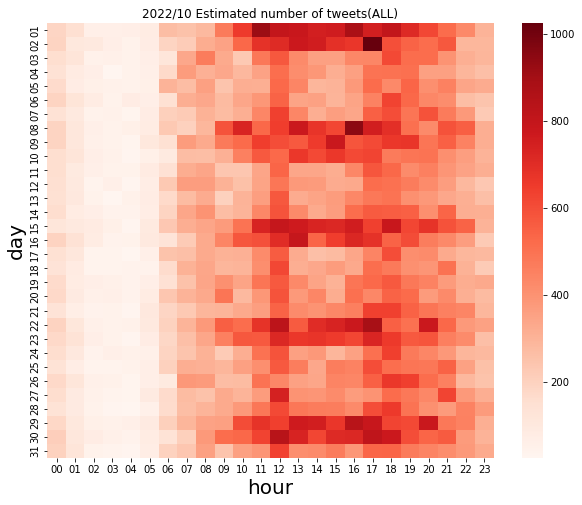

In [18]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate_month10,xticklabels=hour_list, yticklabels=day_list, cmap="Reds")
heatmap.set_title('2022/10 Estimated number of tweets(ALL)')
heatmap.set_xlabel('hour',fontsize=20)
heatmap.set_ylabel('day',fontsize=20)

Text(69.0, 0.5, 'day')

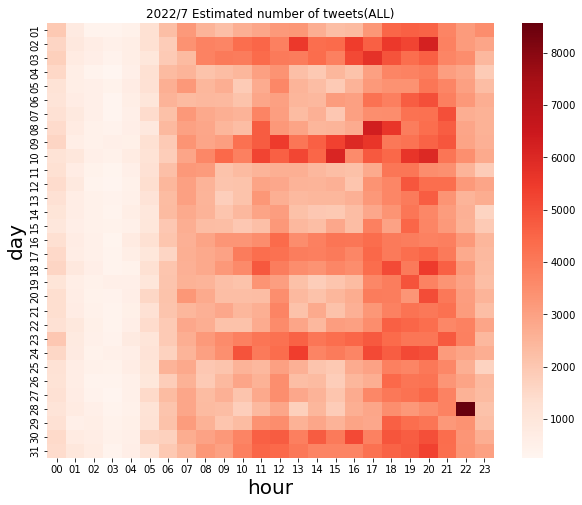

In [17]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate_month7,xticklabels=hour_list, yticklabels=day_list, cmap="Reds")
heatmap.set_title('2022/7 Estimated number of tweets(ALL)')
heatmap.set_xlabel('hour',fontsize=20)
heatmap.set_ylabel('day',fontsize=20)

In [19]:
day=12
day = int(day)
df_perday = df_month7[(df_month7['created_at'].dt.day==day)]
df_perday[(df_perday['created_at'].dt.hour==22)]

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,author_followers,author_tweets,author_description,author_location,creatid_at_day,creatid_at_hour
28604,0,@uxtudosmx 美味しいですよ😋🎶。,2022-07-12 22:59:58,0.0,1.0,1.0,0,de733ecbe94a943c,384361644,M__Soka,299.0,15930.0,2011年4月からシンガーソングライターあえかさんを応援しています。路上ライブがきっかけでイ...,NaN,12,22
28605,1,@The_Scalpel_ いやあのそのありがとうございます,2022-07-12 22:59:55,0.0,0.0,1.0,0,1b0cfebe3424e14f,1275465709754044416,DUKE790black,850.0,3183.0,ビール飲みたい 昼飲みの人 日焼けマスター 足つきJK,京都府,12,22
28606,2,King Gnu。いつか、あずささん、響とコラボしないかなー。違うか！,2022-07-12 22:59:54,0.0,0.0,0.0,0,de41e0d24ed75302,59751442,UD2,1402.0,29280.0,「遊び」をクリエイトする。アソビきれない毎日を。楽しく、熱心に。死ぬまでイキイキと生きる。,横浜市,12,22
28607,3,これは、ひどい https://t.co/uAYhbY1vL7,2022-07-12 22:59:51,0.0,0.0,0.0,0,faab662cb34cf04f,134739974,megminHighG,13.0,390.0,夫とお空の猫おうちの猫2匹の5人家族です。美味しいものをお気に入りの器で食することに日々力を...,東京 杉並区,12,22
28608,4,ん？また梅雨来たん？,2022-07-12 22:59:51,0.0,0.0,3.0,0,7efb0fd5276fdda5,1111589016,god_of_888,1217.0,45852.0,Twitterは主にセンスあるバカをRTでシェアする目的で運用しています。住所不定無職（元ホ...,惑星ベジータ,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28699,95,ヴィヴィくんとマリノス君〜〜〜😭😭😭😭なぜかマリノスケのぬいも持ってくれてる😭😭😭ヴィヴィく...,2022-07-12 22:58:10,0.0,0.0,11.0,0,bb7a59998ec7fdba,121681814,merumo22supi,1120.0,43085.0,物心ついた時からマリサポ！2018年～念願の横浜市民に！仕事も新横浜に転職！年チケ指定席民。...,NaN,12,22
28700,96,@miya_042128 頑張って、一ヶ月後撮影行きましょう,2022-07-12 22:58:09,0.0,1.0,1.0,0,65b41c11aca77bdb,201230874,hiro930728,1714.0,57324.0,下総守 大文（しもうさのかみ ひろふみ）と申します。 カメラマン兼レイヤーやってます。 いつ...,下総国,12,22
28701,97,#ユニコーンに乗って の感想共有会やってますー！ https://t.co/LSIbfcCJvH,2022-07-12 22:58:08,0.0,0.0,2.0,0,0fd33386c57b038a,54607390,hassy0607,3630.0,11964.0,株式会社ペライチ 取締役Co-Founder バックグラウンドはエンジニア ホームページを誰...,東京都板橋区,12,22
28702,98,中国の一部族かと思うくらい発想が似ている。 https://t.co/sUGv68MPCs,2022-07-12 22:58:07,0.0,0.0,0.0,0,594fa6c6bc5b5ba9,52586127,Shinoyama_K,20528.0,17645.0,「かばんの会」会員。トイカメラも好きなパタゴマニア□ 特技札勘、縦勘も横勘も I like ...,Tokyo,12,22


In [34]:
df_perday

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,author_followers,author_tweets,author_description,author_location,creatid_at_day,creatid_at_hour
28803,0,@miko_yose 私も朝と夜漕ぎました！！笑,2022-07-13 00:59:55,0.0,1.0,0.0,0,1b0cfebe3424e14f,4358176818,g_t_o_k,67.0,2549.0,91LINE✌️03AREA🗼らんぺいじとばりすてぃっくぼーいずと、いろいろです。男の子のカ...,TOKYO,13,00
28804,1,本日、２年５ヶ月ぶりに新宿バドミントンクラブ活動が再開できましたーーーーヽ(´▽｀)/長かっ...,2022-07-13 00:59:55,0.0,2.0,33.0,0,0fd33386c57b038a,265146644,gots_ikazo,365.0,19756.0,新発田脱藩🏡ネコ🐈と酒🍶肉🥩魚🐟が好物✈️石垣島に移住したい🏝 ベイスターズ#31⚾️アルビ...,東京 板橋区,13,00
28805,2,@motoyawata__bot @bctcity8 とんでもない事ですね､､､許せません。...,2022-07-13 00:59:48,0.0,0.0,2.0,0,db215c78c59027e4,131059557,wataya_wataru,1421.0,5857.0,市川市の本八幡にある地魚、煮込み、串揚げがメインの居酒屋です。全国の地酒にも力入れてます！日...,市川市・本八幡2-12-8,13,00
28806,3,@Ze79337837 とにかくお気をつけてムリせず、先ずは無事に帰宅ー到着してください🙏,2022-07-13 00:59:48,0.0,1.0,1.0,0,dded92a2db180dd1,145855797,iwa_man,2326.0,104150.0,あなたのおかげで人生360度変わりました😆 ＮＥＴでは良い人を気取ってますが果たしてその現実...,Yokohama Japan,13,00
28807,4,@White_Knight700 @Lemond71 さらにTLで流れてきました😇 http...,2022-07-13 00:59:46,0.0,0.0,2.0,0,1df8c91136c4c140,1070514624234086400,DeringerCamp,1491.0,45992.0,キャンプ初心者。もやい結びできます。 コロナ禍ギグワーカー。いつもパッソルで配達しています。...,京浜焚火會 KEIHIN BONFIRE BOYS,13,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31183,94,@461_koichi 萬井さん✨いつもありがとうございます🤗💕♬✨今日も一日お疲れ様でした...,2022-07-13 23:57:56,0.0,0.0,1.0,0,519decbcbebfd98d,1075794524688056320,darkponpoko,30200.0,86250.0,お仕事:癒し系お料理アイドル💁‍♀️ 趣味: お料理🍳園芸🌻🍅美容・手芸🧵テニス🎾ボウリング...,東京 町田市,13,23
31184,95,お昼 食べていないから お腹すいた,2022-07-13 23:57:56,0.0,0.0,0.0,0,bb7a59998ec7fdba,965743795189903360,Pc2yhdO5s3kufa5,219.0,259424.0,うた☆プリ🌈🚘🧳🌍🌈✈️神宮寺レン🧡神・横浜 amare レン坦🤟🧡🌹🌹トキヤHAYATO様...,神宮寺薔薇庭園のおばちゃん🌹🌹,13,23
31185,96,@Huku_777_naru @Si2uDQ08BszfCLz AFURI◎な気がします😋,2022-07-13 23:57:53,0.0,1.0,4.0,0,4565848a442883a5,343136998,masaki_0422,710.0,4971.0,週5美容師、笑顔溢れる人間力を確立し、豊かな人生を送れるようにします。 その為には 一人では...,東京都,13,23
31186,97,レンくんドルソン発売おめでとう！！Ready to be a ladyにやられたと思ったらD...,2022-07-13 23:57:46,0.0,0.0,1.0,0,735b6f2b933efaf6,820254450820399106,akayuono,68.0,692.0,20↑/カルナイ/うたプリ/嶺二/乙女ゲーム/スタリ箱推し❤️💙💛💜🧡💗💚,NaN,13,23


In [32]:
list_tweet_range[27]

array([ 324.,  465.,  595., 1008.,  754.,  296.,  173.,  123.,  153.,
        157.,  194.,  150.,  126.,  203.,  146.,  190.,  134.,  121.,
        103.,  110.,  101.,   95.,   42.,  168.])

In [27]:
estimate[27]

array([1111.11111111,  758.70967742,  580.84033613,  357.14285714,
        477.4535809 , 1191.89189189, 2080.92485549, 2868.29268293,
       2352.94117647, 2292.99363057, 1800.        , 2400.        ,
       2857.14285714, 1773.39901478, 2465.75342466, 1875.78947368,
       2659.70149254, 2885.95041322, 3495.14563107, 3240.        ,
       3528.71287129, 3789.47368421, 8571.42857143, 2142.85714286])